Aula 28/03

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importar o dataset
#printar as 5 primeiras linhas 
import pandas as pd
diabetes_df = pd.read_csv("diabetes_clean.csv")
print (diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [5]:
diabetes_df['glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: glucose, Length: 768, dtype: int64

In [9]:
diabetes_df[diabetes_df['glucose']==0]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [6]:
diabetes_df['bmi']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: bmi, Length: 768, dtype: float64

In [7]:
#vamos filtrar os dados das colunas sem que os valores sejam iguais 
#a zero e atribuir ao dataset ja filtrados
diabetes_df[
    (diabetes_df['glucose'] > 0)
    & (diabetes_df['bmi'] > 0)
]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#atrbuindo
diabetes_df = diabetes_df[
    (diabetes_df['glucose'] > 0)
    & (diabetes_df['bmi'] > 0)
]

In [9]:
#todas as colunas menos 'glucose'
X = diabetes_df.drop("glucose", axis=1).values
#Ambos são convertidos em arrays NumPy usando .values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
X

array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]],
      shape=(752, 8))

In [12]:
#Fazendo Previsões com uma Única Feature
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)
#resultao so mostra linhas indicicando que só tem vetores


(752,) (752,)


In [13]:
# vamos ter que remodelar X shape pois Para o scikit-learn,
#  X_bmi precisa ser 2D
# -1 é equivalente a última linha, e 1 afirma que temos apenas uma única coluna.  
X_bmi = X_bmi.reshape(-1, 1)  # cria uma matriz 2D de uma única coluna.
print(y.shape, X_bmi.shape)
#vetor de 752 linhas e 1 coluna pra 752 linhas

(752,) (752, 1)


In [14]:
#Plotando Glicose vs. IMC para verificar como os dados estão distribuidos 
#utilizando matplolib as plt
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt

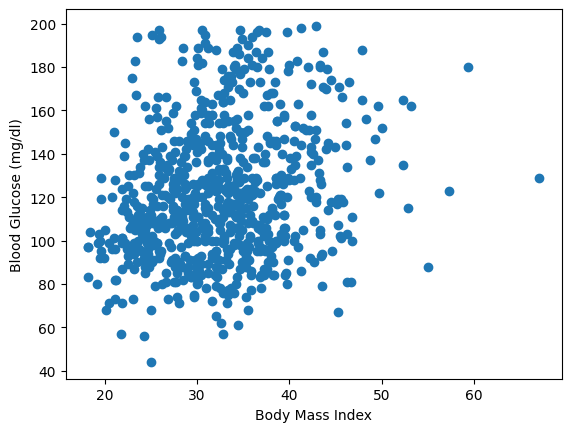

In [18]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

plt.show()

In [20]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
#Ajustando um Modelo de Regressão 
#importamos o modelo de regressao linear do scikit
from sklearn.linear_model import LinearRegression
#treinando o  modelo com o .fit
reg = LinearRegression()
reg.fit(X_bmi, y)
#após treinar realizamos predições com os dados do trenamnto para determinar a linha 
predictions = reg.predict(X_bmi)
#plotamos os dados para fazer o grafico mas adciona as predições
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='red')
plt.ylabel("Blood Glucose (mg/di)")
plt.xlabel("Body mass index")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [752, 4546]

In [ ]:
# **Resultado da Regressão**

#- A **linha preta** representa o modelo linear
#- Indica uma **correlação positiva fraca a moderada** entre IMC e glicose

Exercicios 04

In [26]:
advertising_and_sales_df= pd.read_csv("advertising_and_sales_clean.csv")
print(advertising_and_sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [27]:
import pandas as pd 
import numpy as np
sales_df=pd.read_csv("advertising_and_sales_clean.csv")
x= sales_df["radio"].values
y= sales_df["sales"].values
x= x.reshape(-1, 1)

print(x.shape, y.shape)

(4546, 1) (4546,)


In [28]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x, y)
predictions=reg.predict(x)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


In [29]:
import matplotlib.pyplot as plt

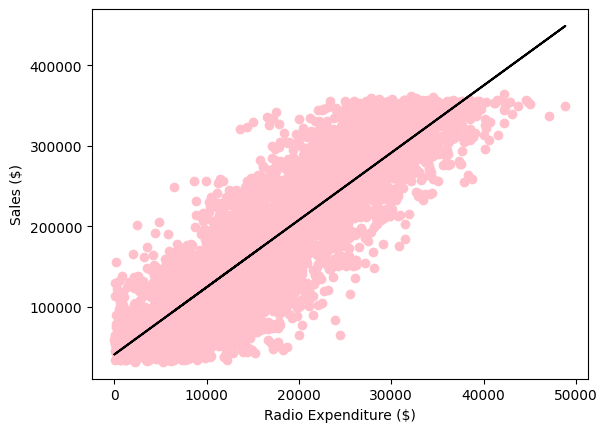

In [25]:
plt.scatter(x, y, color="pink" )
plt.plot(x, predictions, color="black")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()


Aula 7 - Fundamentos Matemáticos da Regressão Linear

In [30]:
import pandas as pd
diabetes_df = pd.read_csv("diabetes_clean.csv")
print (diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [32]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.


In [34]:
print(sales_df.isnull().sum())


tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64


In [35]:
diabetes_df[
    (diabetes_df['glucose'] > 0)
    & (diabetes_df['bmi'] > 0)
]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [1]:
diabetes_df = diabetes_df[
    (diabetes_df['glucose'] > 0)
    & (diabetes_df['bmi'] > 0)
]

NameError: name 'diabetes_df' is not defined